# Find Quantum State with Alternating Bits

## Task description
QOSF Screening tasks - Cohort 4

Task 1 

Design a quantum circuit that considers as input the following vector of integers numbers: 

[1,5,7,10]
returns a quantum state which is a superposition of indices of the target solution, obtaining in the output the indices of the inputs where two adjacent bits will always have different values. In this case the output should be: 1/sqrt(2) * (|01> + |11>), as the correct indices are 1 and 3.

1 = 0001
5 = 0101
7 = 0111
10 = 1010

The method to follow for this task is to start from an array of integers as input, pass them to a binary representation and you need to find those integers whose binary representation is such that two adjacent bits are different. Once you have found those integers, you must output a superposition of states where each state is a binary representation of the indices of those integers.

Example 1

Consider the vector [1,5,4,2]

Pass the integer values to binary numbers that is [001,101,100,010]

Identifies which values whose binary representation is such that two adjacent bits are different, we can see that are 2 101 and 010, [001,101,100,010].

Returns the linear combination of the indices in which the values satisfying the criterion are found.

Indices:

   0     1      2  	3
   
   
[001,101,100,010]

Indices are converted to binary states

|00> |01> |10> |11>



[001,101,100,010]

The answer would be the superposition of the states |01> and |11> or 1/sqrt(2) * (|01> + |11>)


# Solution 
Step 1. Define input vector [1,5,7,10] in a classical state. Correspondingly, assume its index vector is [0,1,2,3] - in equivalent binary form: [00,01,10,11].

Step 2. Find the location of alternating element within the input vector, then translate them into binary form. The number of binary digits m in an input element defines the target elements. For example, with even m, target1 = 2^(m) + 2^(m-2) + ... + 1 and target2 = 2^(m-1) + 2^(m-3) + ... + 2; with odd m, target1 = 2^(m-1) + 2^(m-2) + ... + 1 and target2 = 2^(m) + 2^(m-3) + ... + 2. With the definative target elements, it is relatively easy to find their corresponding location within the input vector in a classical way.

Step 3. Use Grover's algorithm to amplify the two binary states from step 2 as output.

### Step 1. Define input vector in a classicle state

In [1]:
# from qiskit import QuantumCircuit, execute, QuantumRegister
from qiskit import BasicAer
from qiskit.quantum_info import Statevector
from qiskit import QuantumCircuit
import numpy as np
import math

import warnings
warnings.simplefilter('ignore', DeprecationWarning)

# Define the input vector as a classical state
input_vec = [1,5,7,10] 


### Step 2. Find the location of the alternating element in the input vector, and translate it into binary form

In [2]:
# Calculate the alternating elements
m = int(math.ceil(math.log2(max(input_vec)))) # the number of binary digits for every element, defined by the max number in the input vector
target1 = 1 # target alternating element 1
target2 = 2 # target alternating element 2

if m%2 == 0:
    target1 = 1 # target alternating element 1
    target2 = 2 # target alternating element 2
    for i in range(2,m,2):
        target1 = target1 + 2**(i)
        target2 = target2 + 2**(i+1)

else:
    target1 = 1 # target alternating element 1
    target2 = 0 # target alternating element 2
    for i in range(2,m,2):
        target1 = target1 + 2**(i)
        target2 = target2 + 2**(i-1)
   

 # Find target location within input_vec
loc1 = input_vec.index(target1)
loc2 = input_vec.index(target2)


# Define the number of qubits needed based on log2(number of elements in input_vec)
num_qubits = int(math.ceil(math.log2(len(input_vec))))

# Translate the target location into binary states
binary_format = '0' + str(num_qubits) + 'b'
desired_states = [0]*2
desired_states[0] = format(loc1, binary_format)
desired_states[1] = format(loc2, binary_format)

print('target1 = ', target1,', ','target2 = ', target2)
print('location of target 1 = ', loc1, ', ', 'location of target 2 = ', loc2 )
print('desired_states = ', desired_states)


target1 =  5 ,  target2 =  10
location of target 1 =  1 ,  location of target 2 =  3
desired_states =  ['01', '11']


### Step 3. Use Grover's algorithm to find the desired binary states

In [3]:
from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover



# Define the oracle based on the desired_states list
oracle = QuantumCircuit(num_qubits)
oracle.h(0)
oracle.x(1)

# Use Grover's algorithm to find the desired states
qasm_simulator = Aer.get_backend('qasm_simulator')

optimal_num_interations = Grover.optimal_num_iterations(num_solutions = 1, num_qubits = num_qubits)
grover = Grover(oracle=oracle, good_state=desired_states, iterations=optimal_num_interations)
output = grover.run(quantum_instance=qasm_simulator)



print('output state measurement results:', output.measurement)

output state measurement results: {'01': 513, '11': 511}


In [321]:
oracle

Statevector([0.        +0.j, 0.70710678+0.j, 0.        +0.j,
             0.70710678+0.j],
            dims=(2, 2))


In [ ]:

# Calculate the number of binary digits needed for the element of the input vector 
max_num = max(input_int)
m = len(format(max_num,'b')) 

C:\Users\Jiaxi\Anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


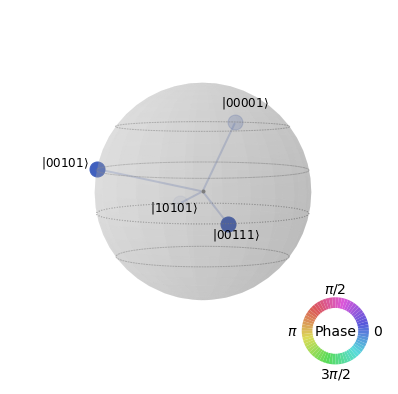

In [286]:
# from qiskit import QuantumCircuit, execute, QuantumRegister
from qiskit import BasicAer
from qiskit.quantum_info import Statevector

# Input integers
input_int = [1,5,7,21] 

# Store input_int in a dictionary
input_dic = {}
count = 0
for i in input_int:
    input_dic[i] = count
    count = count + 1


# Calculate the number of qubit needed for this task
max_num = max(input_int)
n_qubit = len(format(max_num,'b'))
n_qubit

    
# Change int inputs in binary format
input_binary = [0]*len(input_int) 

binary_format = '0' + str(n_qubit) + 'b'

count = 0
for i in input_int:
    input_binary[count] = format(i, binary_format)
    count = count + 1

    
# Prepare binary inputs as a quantum state  
for i in input_binary:
    temp_state = Statevector.from_label(i)
    if i == input_binary[0]:
        input_state = temp_state
    else:
        input_state = input_state + temp_state

# Check oracle by plotting the qsphere
input_state.draw('qsphere')
    


In [289]:
input_binary

['00001', '00101', '00111', '10101']

## Find the desired states

In [233]:
# Write down the desired state in vector form
desired_states = [0]*2

if (n_qubit % 2) == 0:
    desired_states[0] = '01' * int(n_qubit/2)
    desired_states[1] = '10' * int(n_qubit/2)
else:
    desired_states[0] = '01' * int(n_qubit/2) + '0'
    desired_states[1] = '10' * int(n_qubit/2) + '1'




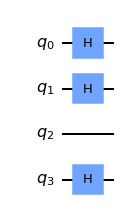

In [243]:
from qiskit import QuantumCircuit
n = 4
circuit = QuantumCircuit(n)
#vector = [0]*16
#vector[1] = 1/2
#vector[5] = 1/2
#vector[7] = 1/2
#vector[10] = 1/2
circuit.h(0)
circuit.h(1)
circuit.h(3)
theta = 2 * np.arccos(1 / np.sqrt(3))
#circuit.ry(theta, 0)
circuit.draw('mpl')

In [244]:
# Use Grover's algorithm to find the desired states
from qiskit import Aer
from qiskit.aqua import QuantumInstance
from qiskit.aqua.algorithms import Grover

qasm_simulator = Aer.get_backend('qasm_simulator', shots=1000)

oracle = Statevector.from_label(desired_states[0])
oracle = oracle + Statevector.from_label(desired_states[1])

optimal_num_interations = Grover.optimal_num_iterations(num_solutions = 2, num_qubits = 4)
grover = Grover(oracle=oracle, good_state=desired_states, iterations=optimal_num_interations, state_preparation=circuit)


result = grover.run(quantum_instance=qasm_simulator)
print('Measurement result:', result.measurement)

Measurement result: {'0001': 7, '1001': 6, '1010': 969, '0011': 9, '0010': 7, '1011': 9, '1000': 6, '0000': 11}


In [245]:
result

{'measurement': {'0001': 7, '1001': 6, '1010': 969, '0011': 9, '0010': 7, '1011': 9, '1000': 6, '0000': 11}, 'top_measurement': '1010', 'circuit': <qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x000001C3863E8A60>, 'assignment': '1010', 'oracle_evaluation': True}

C:\Users\Jiaxi\Anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


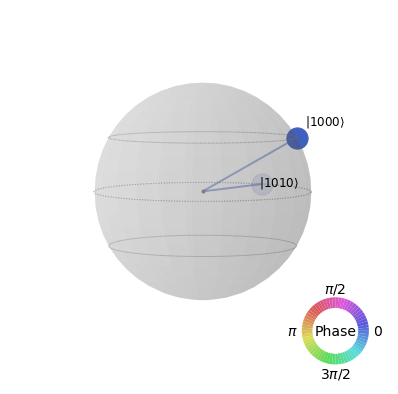

In [221]:
Statevector(state_preparation).draw('qsphere')

In [176]:
Statevector(state_preparation)

Statevector([0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j, 0. +0.j, 0. +0.j,
             0. +0.j, 0. +0.j],
            dims=(2, 2, 2, 2))


C:\Users\Jiaxi\Anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


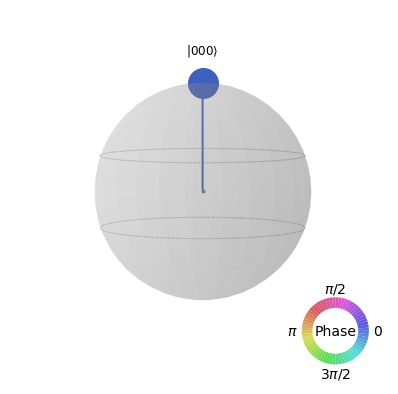

In [195]:
oracle = QuantumCircuit(3)
oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)
Statevector(oracle).draw('qsphere')

In [214]:
#Example from qiskit using state_preparation

import numpy as np

# Specifying `state_preparation` 
# to prepare a superposition of |01>, |10>, and |11>
oracle = QuantumCircuit(3)
oracle.h(2)
oracle.ccx(0,1,2)
oracle.h(2)

theta = 2 * np.arccos(1 / np.sqrt(3))
state_preparation = QuantumCircuit(3)
state_preparation.ry(theta, 0)
state_preparation.ch(0,1)
state_preparation.x(1)
state_preparation.h(2)

# we only care about the first two bits being in state 1, thus add both possibilities for the last qubit
grover = Grover(oracle=oracle, state_preparation=state_preparation, good_state=['110', '111'])

# state_preparation
print('state preparation circuit:')
grover.grover_operator.state_preparation.draw(output='mpl')

result = grover.run(quantum_instance=qasm_simulator)
print('Measurement result:', result.measurement)

state preparation circuit:
Measurement result: {'111': 928, '001': 25, '010': 13, '101': 21, '011': 19, '110': 18}


C:\Users\Jiaxi\Anaconda3\envs\qiskit_env\lib\site-packages\qiskit\visualization\bloch.py:68: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


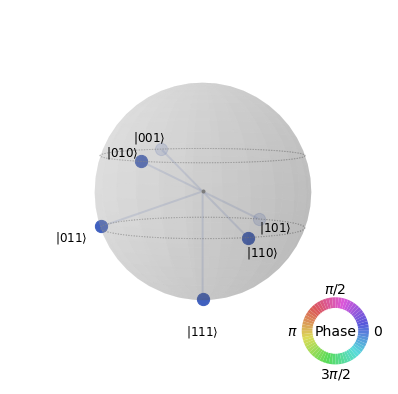

In [215]:
Statevector(state_preparation).draw('qsphere')